In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



In [3]:
df = pd.read_csv('Capstone Files/Merged Files/Poverty_Hospitals_Mortality_Insurance.csv')
df.head()

,State,Deaths,Population,Crude Rate,Number_of_Hospitals,Staffed_Beds,Total_Discharges,Patient_Days,Gross_Patient_Revenue($),Employer Insurance,Non-Group Insurance,Medicaid Insurance,Medicare Insurance,Military Insurance,Uninsured,Average of All_Ages_SAIPE_Poverty_Universe,Average of All_Ages_in_Poverty_Count,Average of All_Ages_in_Poverty_Percent,Average of Median_Household_Income_in_Dollars
0,Alabama,266073,24388082,1091.0,90,15127,577473,2768330,63612420,0.4674,0.0598,0.1996,0.1554,0.0204,0.0976,4755140.2,808309.8,17.00,48197.4
1,Alaska,22287,3689104,604.1,10,1274,45131,243451,5881291,0.4726,0.0398,0.2074,0.0876,0.0596,0.1328,719958.4,75908.4,10.52,75141.6
2,Arizona,288220,35225769,818.2,78,13774,609674,2727388,86444904,0.4422,0.0600,0.2224,0.1540,0.0158,0.1056,6885729.4,1048566.8,15.26,56513.6
3,Arkansas,161185,15002360,1074.4,51,8011,316530,1388729,28471124,0.4176,0.0622,0.2656,0.1538,0.0154,0.0856,2911377.8,494977.0,17.00,45696.4
4,California,1328284,197000756,674.3,339,73849,3045511,14096066,457437847,0.4692,0.0728,0.2634,0.1082,0.0098,0.0762,38651294.2,5224283.8,13.54,71931.2


<AxesSubplot:>

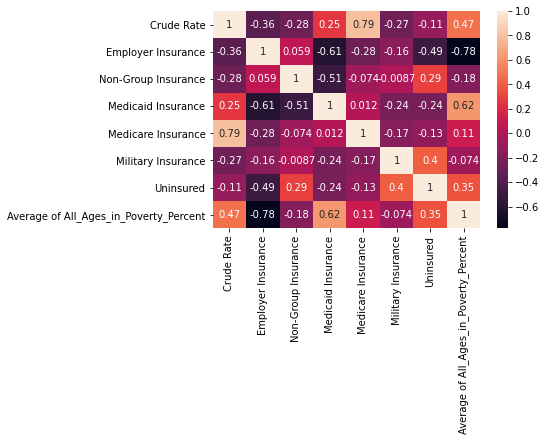

In [4]:
poverty_insurance = df.copy()
poverty_insurance = poverty_insurance[['State', 'Crude Rate','Employer Insurance', 'Non-Group Insurance','Medicaid Insurance','Medicare Insurance','Military Insurance','Uninsured','Average of All_Ages_in_Poverty_Percent']]
sns.heatmap(poverty_insurance.corr(), annot=True)

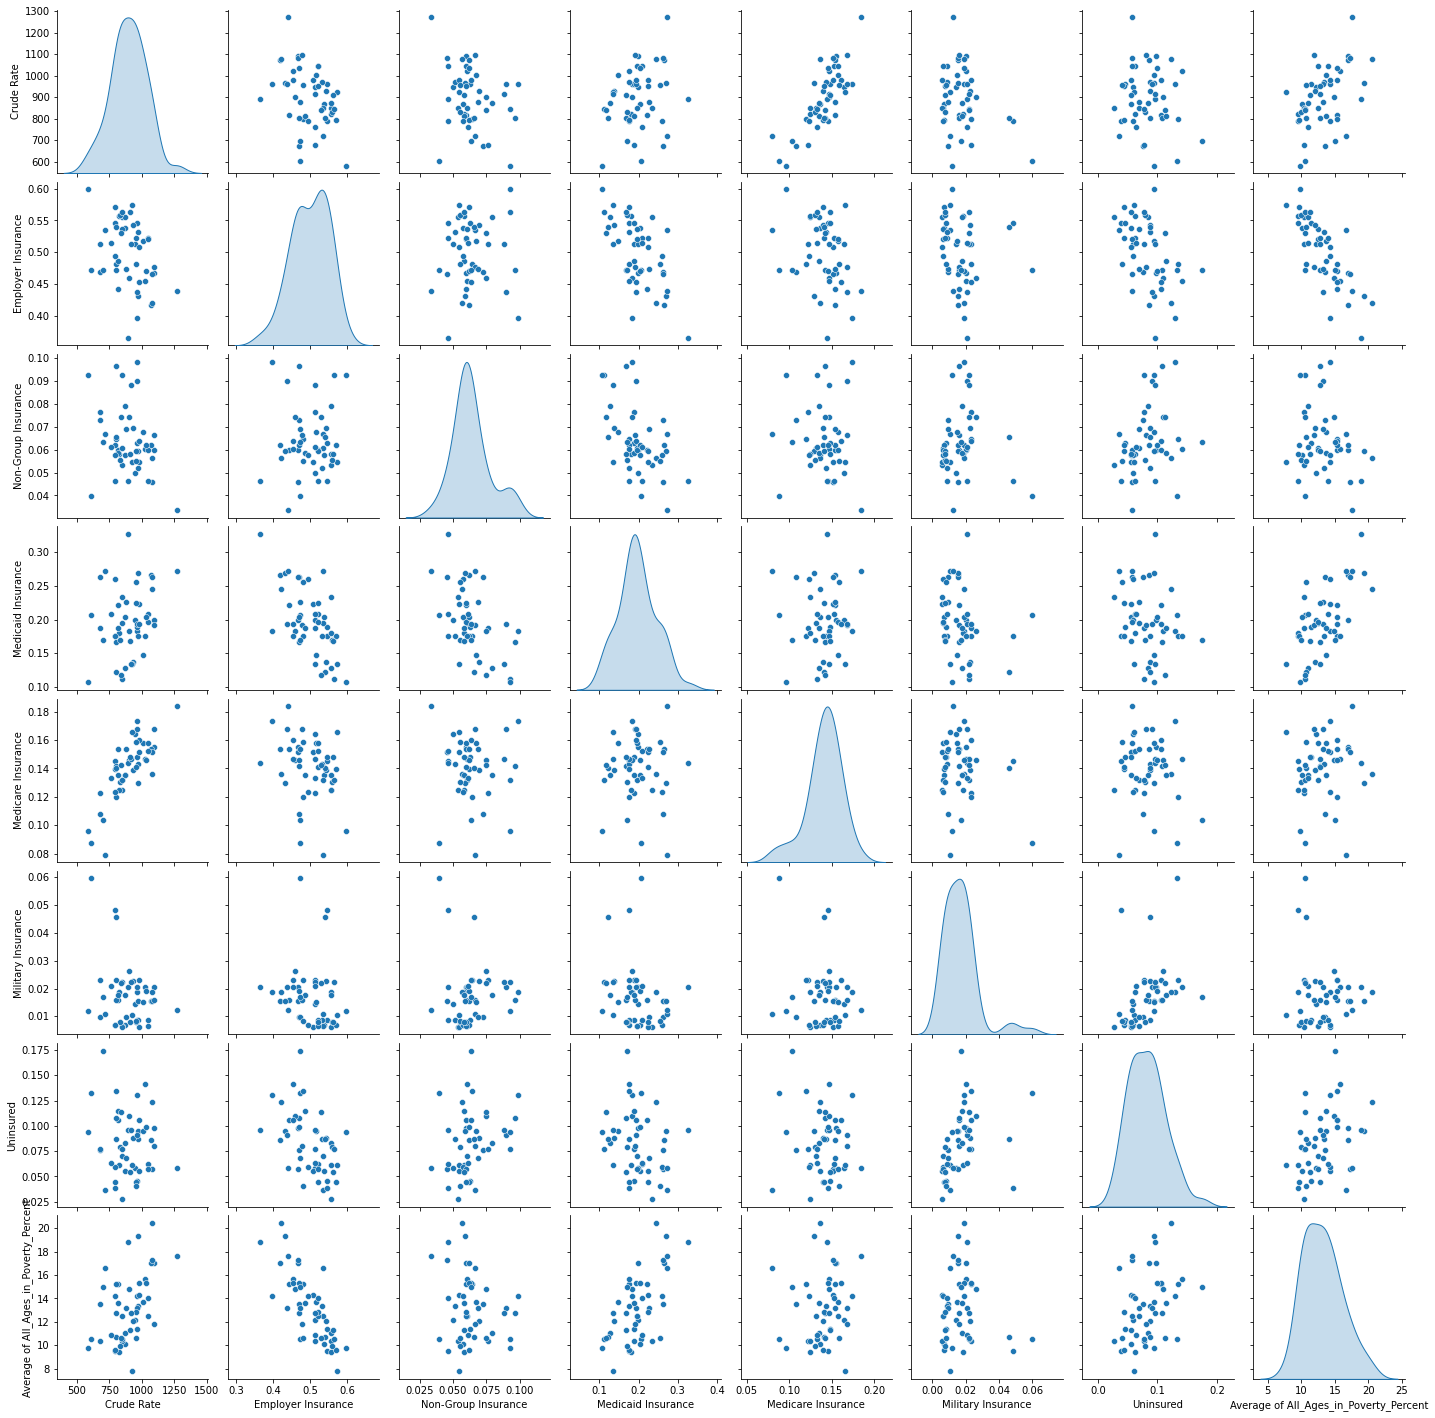

In [5]:
sns.pairplot(data=poverty_insurance,diag_kind="kde")

In [33]:
poverty_medicaid = poverty_insurance.copy()
poverty_medicaid = poverty_medicaid.drop(columns = ['Non-Group Insurance','Medicare Insurance','Military Insurance', 'Crude Rate', 'State'])
poverty_medicaid.rename(columns = {'Average of All_Ages_in_Poverty_Percent':'Average Poverty Percentage'}, inplace = True)


In [39]:
fig = px.scatter_matrix(poverty_medicaid, title='Scatter Matrix of Insurance Status and Average Poverty Percentage')
fig.update_layout(
    title={        
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 1000, height=1000)